<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# Distance and the Cost of Living in Denver



# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)

- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract

I gathered housing data in the Denver are on Zillow to understand the relationship between distance to downtown and price of the house.  I cleaned up the initial data by deleting the nulls and changing the type of the data.  I added columns from splitting the data in the Address column and calculated the distance between two longitude and latitude points.  I created multiple scatter plots, geographical maps, correlation matrix to help analyze the data.  I created regression models based off the high correlated features to the target price to determine the if the model could accurately predict the price of the house.  I was able to get a model that had a R squared value of 0.98 and RMSE of 40059.

## Introduction

I wanted to deal with a real world problem and with real data for my project.  I gathered Denver Housing Data from Zillow with the help of a web scraper, so the data is current.  The columns that was able to grab from the website were the following: ['Zillow URL', 'Address', 'Price', 'Latitude', 'Longitude', 'Zestimate','Year Built', 'Garage', 'Beds', 'Baths', 'Sqft'].  I started the data cleaning process by deleting the missing values and nulls from the data and changing the data to the type I needed.  Next I wanted to add a couple of columns to the data to add more parameters to my model.  I first calculated the distance from my office building by finding the difference between to latitudes and longitudes.  I then plotted scatter plots Distance vs. Price.  The results were not what I expected and there was a low correlation.  I next decided to investigate further and plot the lat and long and have the Price as the color scheme to depict where the most expensive houses were located.  I also used folium to plot the house on a geographical map.  After discovering a disappointing result,  I begin to create a model with Sqft and Price. 

## 1. The problem

Moving to a new city and buying a house can be stressful when you are not familiar with your surroundings.  I want to build a program that will give someone an idea of where to look with taking into account distance to your place of work.

[Back to top](#Table-of-contents)

## 2. Purpose of the study

The purpose of this project is to determine a place of residence while considering the price and distance from work.  In this case, my place of work is in downtown Denver

[Back to top](#Table-of-contents)

## 3. Project description

I have gathered housing data from Zillow with the following columns ['Zillow URL', 'Address', 'Price', 'Latitude', 'Longitude', 'Zestimate','Year Built', 'Garage', 'Beds', 'Baths', 'Sqft'].  I have used the longitude and latitude of my place of work (39.747070, -104.997620)  and created a column to calculate the distance between the two longitudes and latitudes. After discovering a low correlation between Distance and Price I continued the project to find a relationship between other features and Price.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis

The closer to the city the more expensive the housing becomes.

[Back to top](#Table-of-contents)

### 3.2 Workflow

What's the process you are going to follow to solve the problem based on the Problem-Solving Framework:

- Define the problem 
- Map the system 
- Define suitable metrics 
- Select modeling tools 
- Implement model  
- Evaluate model 
- Deploy the final model 


[Back to top](#Table-of-contents)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import statsmodels.api as sm

import sklearn as sk
from sklearn import linear_model

import matplotlib
import matplotlib.pyplot as plt

import folium
from folium.plugins import MarkerCluster

import haversine as hs
from haversine  import Unit


import plotly.express as px
#import geopandas as gpd
#from shapely.geometry import Point


%matplotlib inline

# Downtown Denver = (39.747070, -104.997620)


In [2]:
## Load data and view / clean intial data

In [3]:
df = pd.read_csv('housingdata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  796 non-null    int64  
 1   Zillow URL  796 non-null    object 
 2   Address     796 non-null    object 
 3   Price       796 non-null    float64
 4   Latitude    796 non-null    float64
 5   Longitude   796 non-null    float64
 6   Zestimate   767 non-null    object 
 7   Year Built  796 non-null    int64  
 8   Garage      796 non-null    int64  
 9   Beds        791 non-null    float64
 10  Baths       791 non-null    float64
 11  Sqft        796 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 74.8+ KB


In [5]:
df.describe()

Unnamed: 0         Price    Latitude   Longitude   Year Built  \
count  796.000000  7.960000e+02  796.000000  796.000000   796.000000   
mean   398.864322  7.017706e+05   39.713843 -104.961209  1981.440955   
std    230.668548  5.547385e+05    0.151096    0.162583    30.057099   
min      0.000000  2.050000e+05   39.381777 -105.516644  1886.000000   
25%    198.750000  4.447500e+05   39.607070 -105.065276  1964.000000   
50%    399.500000  5.490000e+05   39.709879 -104.960117  1984.500000   
75%    598.250000  7.174750e+05   39.817290 -104.821385  2004.000000   
max    797.000000  4.995000e+06   40.045815 -104.450203  2022.000000   

           Garage        Beds       Baths          Sqft  
count  796.000000  791.000000  791.000000    796.000000  
mean     1.915829    3.581542    3.024020   2434.315327  
std      1.000227    1.100340    1.199443   1405.304133  
min      0.000000    1.000000    1.000000    420.000000  
25%      1.000000    3.000000    2.000000   1535.250000  
50%      2.000000    3.000000    3.000000   2070.500000  
75%      2.000000    4.000000    4.000000   2905.250000  
max      9.000000    8.000000    9.000000  12208.000000

In [6]:
df.shape

(796, 12)

In [7]:
null = pd.isnull(df)
null.head()

Unnamed: 0  Zillow URL  Address  Price  Latitude  Longitude  Zestimate  \
0       False       False    False  False     False      False      False   
1       False       False    False  False     False      False      False   
2       False       False    False  False     False      False      False   
3       False       False    False  False     False      False      False   
4       False       False    False  False     False      False      False   

   Year Built  Garage   Beds  Baths   Sqft  
0       False   False  False  False  False  
1       False   False  False  False  False  
2       False   False  False  False  False  
3       False   False  False  False  False  
4       False   False  False  False  False

In [8]:
pd.isnull(df).sum().sum()

39

In [9]:
df = df.dropna()

In [10]:
df.shape

(762, 12)

In [11]:
df.columns

Index(['Unnamed: 0', 'Zillow URL', 'Address', 'Price', 'Latitude', 'Longitude',
       'Zestimate', 'Year Built', 'Garage', 'Beds', 'Baths', 'Sqft'],
      dtype='object')

In [12]:
## Add necessary columns that you would like to see and evaluate

In [13]:
for ind, row in df.iterrows():
    
    Downtown = (39.747070, -104.997620)
    loc2 = (row['Latitude'],row['Longitude'])
    
    
    df.loc[ind, 'Distance'] = hs.haversine(Downtown,loc2, unit = Unit.MILES)

In [14]:
zipcodes = list()

for item in df['Address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

df['zipcodes'] = zipcodes
df = pd.DataFrame(df)

In [15]:
split_data = df["Address"].str.split(",")
data = split_data.to_list()
names = ["Street", "Neighborhood", "Zip"]
new_df = pd.DataFrame(data, columns = names)


In [16]:
df['Neighborhood'] = new_df['Neighborhood']

In [17]:
df['price_per_sqft'] = df['Price'] / df['Sqft']

In [18]:
df.head()

Unnamed: 0                                         Zillow URL  \
0           0  https://www.zillow.com/homedetails/4605-S-Yose...   
1           1  https://www.zillow.com/homedetails/8431-Hope-C...   
2           2  https://www.zillow.com/homedetails/38-N-Irving...   
3           3  https://www.zillow.com/homedetails/975-Flint-W...   
4           4  https://www.zillow.com/homedetails/3912-S-Jopl...   

                                        Address     Price   Latitude  \
0  4605 S Yosemite St UNIT 25, Denver, CO 80237  565000.0  39.633092   
1                8431 Hope Ct, Denver, CO 80229  406000.0  39.849828   
2           38 N Irvington St, Aurora, CO 80018  579999.0  39.717437   
3           975 Flint Way, Broomfield, CO 80020  559000.0  39.929063   
4           3912 S Joplin Way, Aurora, CO 80013  499900.0  39.645374   

    Longitude  Zestimate  Year Built  Garage  Beds  Baths  Sqft   Distance  \
0 -104.887052  $482,965         1986       2   2.0    3.0  1872   9.827340   
1 -104.956631  $399,538         1982       0   3.0    3.0  1920   7.425837   
2 -104.695566  $526,451         2015       3   4.0    4.0  2444  16.179878   
3 -105.079268  $570,555         1972       2   3.0    3.0  2504  13.299719   
4 -104.801430  $489,305         1982       2   4.0    3.0  2553  12.576140   

  zipcodes Neighborhood  price_per_sqft  
0    80237       Denver      301.816239  
1    80229       Denver      211.458333  
2    80018       Aurora      237.315466  
3    80020   Broomfield      223.242812  
4    80013       Aurora      195.808852

In [19]:
corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending = False)

Price             1.000000
Sqft              0.788465
Baths             0.623629
Beds              0.425064
Garage            0.405393
price_per_sqft    0.374108
Year Built        0.104490
Distance          0.072427
Unnamed: 0       -0.024994
Latitude         -0.029025
Longitude        -0.180727
Name: Price, dtype: float64

In [20]:
df.columns

Index(['Unnamed: 0', 'Zillow URL', 'Address', 'Price', 'Latitude', 'Longitude',
       'Zestimate', 'Year Built', 'Garage', 'Beds', 'Baths', 'Sqft',
       'Distance', 'zipcodes', 'Neighborhood', 'price_per_sqft'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 795
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      762 non-null    int64  
 1   Zillow URL      762 non-null    object 
 2   Address         762 non-null    object 
 3   Price           762 non-null    float64
 4   Latitude        762 non-null    float64
 5   Longitude       762 non-null    float64
 6   Zestimate       762 non-null    object 
 7   Year Built      762 non-null    int64  
 8   Garage          762 non-null    int64  
 9   Beds            762 non-null    float64
 10  Baths           762 non-null    float64
 11  Sqft            762 non-null    int64  
 12  Distance        762 non-null    float64
 13  zipcodes        762 non-null    object 
 14  Neighborhood    731 non-null    object 
 15  price_per_sqft  762 non-null    float64
dtypes: float64(7), int64(4), object(5)
memory usage: 121.2+ KB


In [22]:
df.shape

(762, 16)

In [23]:
px.scatter(df, x = 'Distance', y = 'Price')

In [24]:
df = df[df['Price'] < 2000000]

In [25]:
px.scatter(df, x = 'Distance', y = 'Price')

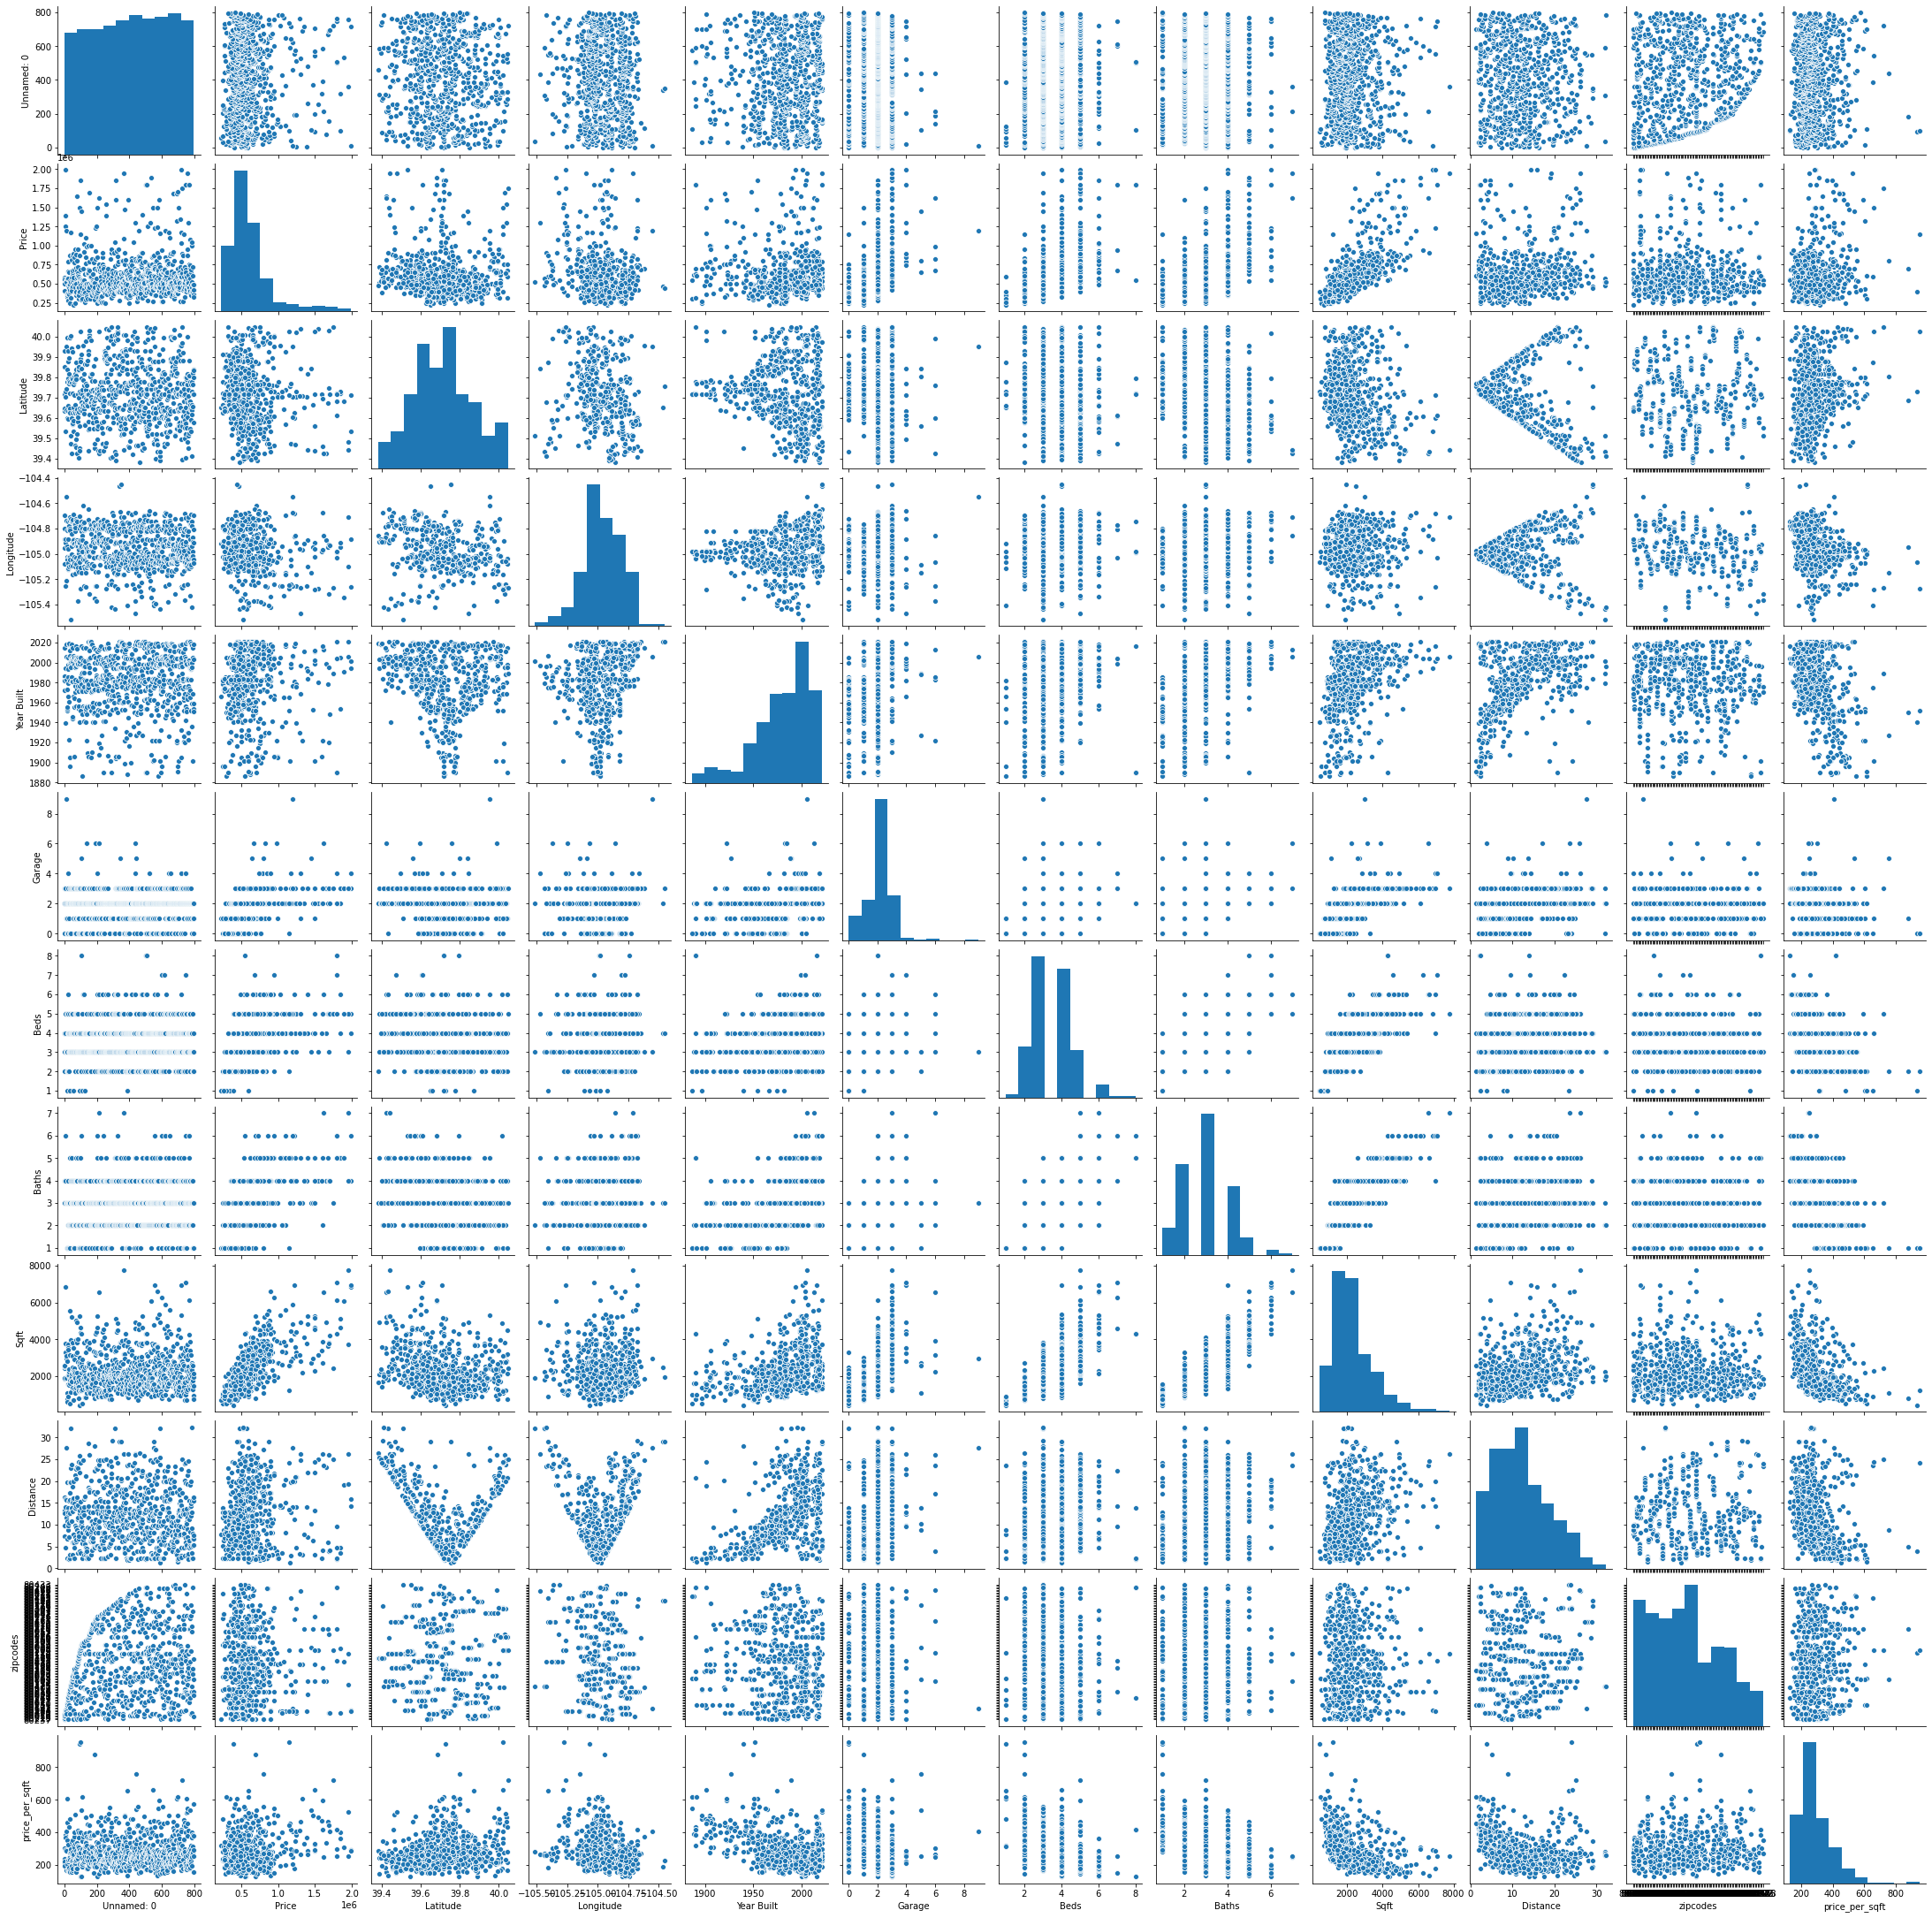

In [26]:
sns.pairplot(df)

In [27]:
m = folium.Map(location = [39.747070, -104.997620], tiles = 'OpenStreetMap', zoom_start = 10)

folium.Marker(location = [39.747070, -104.997620], popup = 'Downtown Denver',
              icon = folium.Icon(color = 'blue')).add_to(m)

MarkerCluseter = MarkerCluster().add_to(m)

for i,row in df.iterrows():
    
    lat = df.at[i, 'Latitude']
    lng = df.at[i, 'Longitude']
    Price = df.at[i, 'Price']
    Address = df.at[i, 'Address']
    Year_Built = df.at[i, 'Year Built']
    
    popup = df.at[i, 'Price'] 
    
    if  1000000 > Price > 600000:
        color = 'red'
        
    elif Price > 1000000 :
        color = 'lightgreen'
    
    else  : 
        color = 'purple'

         
    folium.Marker(location = [lat, lng], popup = popup , icon = folium.Icon(color = color)).add_to(m)

m.save('index.html')

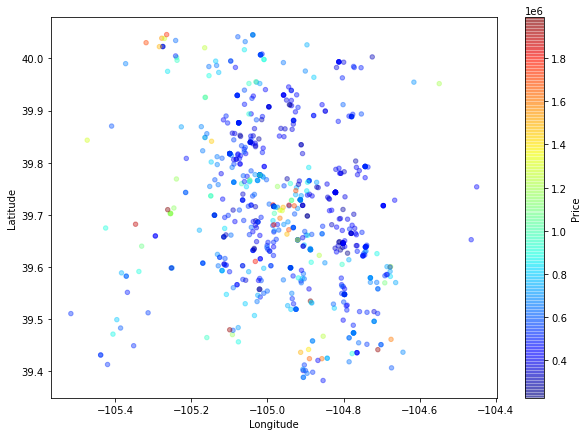

In [28]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(10,7),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [29]:
px.scatter(df, x = 'Sqft', y = 'Price')

In [90]:
px.scatter(df, x = 'Sqft', y = 'Beds')

In [91]:
px.scatter(df, x = 'Sqft', y = 'Baths')

In [30]:
corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending = False)

Price             1.000000
Sqft              0.720399
Baths             0.545837
Beds              0.467553
Garage            0.453530
price_per_sqft    0.229714
Distance          0.112179
Unnamed: 0        0.055565
Year Built        0.037588
Latitude         -0.086708
Longitude        -0.187726
Name: Price, dtype: float64

In [31]:
df.groupby(['Neighborhood']).mean()['Price']

Neighborhood
 Arvada                  7.035952e+05
 Aurora                  6.127787e+05
 Bailey                  5.747250e+05
 Bennett                 6.125000e+05
 Black Hawk              7.680000e+05
 Boulder                 6.392876e+05
 Brighton                6.902143e+05
 Broomfield              6.865066e+05
 Castle Pines            5.850000e+05
 Castle Rock             5.928697e+05
 Centennial              6.186635e+05
 Cherry Hills Village    2.990000e+05
 Commerce City           6.037749e+05
 Conifer                 4.666000e+05
 Denver                  6.203723e+05
 Edgewater               4.150000e+05
 Elizabeth               8.475000e+05
 Englewood               6.510867e+05
 Erie                    5.298800e+05
 Evergreen               5.619333e+05
 Franktown               6.290000e+05
 Golden                  7.491786e+05
 Greenwood Village       8.299667e+05
 Henderson               5.499667e+05
 Highlands Ranch         5.847722e+05
 Lafayette               5.587500e+05

In [32]:
fig = px.box(df, y="Price" , x = 'Neighborhood')
fig.show()

In [33]:
px.scatter(df, x = 'Neighborhood', y = 'Price')

In [34]:
px.scatter(df, x = 'zipcodes', y = 'Price')

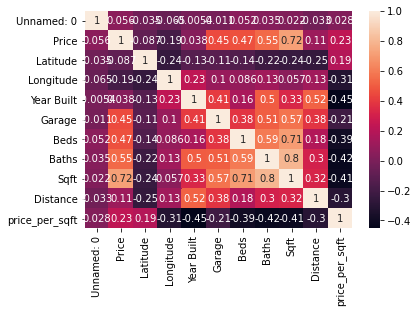

In [35]:
sns.heatmap(df.corr(), annot = True)

In [36]:
fig = px.box(df, y="Price")
fig.show()

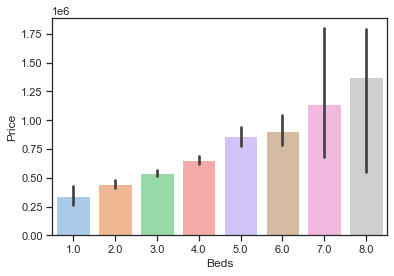

In [37]:
sns.set(style = 'ticks', palette = 'pastel')

sns.barplot(x = 'Beds', y = 'Price', data = df)

plt.show()

In [38]:
X = df[['Distance', 'Sqft']]

Y = df['Price']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [44]:
y_pred = reg.predict(X_test)
print('Linear Regression R squared: %.4f' % reg.score(X_test, y_test))

Linear Regression R squared: 0.4415


In [45]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])

In [46]:
coeff_df

Coefficient
Distance -5836.415958
Sqft       212.901391

In [47]:
df.columns

Index(['Unnamed: 0', 'Zillow URL', 'Address', 'Price', 'Latitude', 'Longitude',
       'Zestimate', 'Year Built', 'Garage', 'Beds', 'Baths', 'Sqft',
       'Distance', 'zipcodes', 'Neighborhood', 'price_per_sqft'],
      dtype='object')

In [48]:
df = df.drop(columns =['Unnamed: 0','Zillow URL', 'Latitude', 'Longitude', 'Year Built','Zestimate',
                    'Distance', 'zipcodes'], axis = 1)

In [49]:
df.head(5)

Address     Price  Garage  Beds  \
0  4605 S Yosemite St UNIT 25, Denver, CO 80237  565000.0       2   2.0   
1                8431 Hope Ct, Denver, CO 80229  406000.0       0   3.0   
2           38 N Irvington St, Aurora, CO 80018  579999.0       3   4.0   
3           975 Flint Way, Broomfield, CO 80020  559000.0       2   3.0   
4           3912 S Joplin Way, Aurora, CO 80013  499900.0       2   4.0   

   Baths  Sqft Neighborhood  price_per_sqft  
0    3.0  1872       Denver      301.816239  
1    3.0  1920       Denver      211.458333  
2    4.0  2444       Aurora      237.315466  
3    3.0  2504   Broomfield      223.242812  
4    3.0  2553       Aurora      195.808852

In [50]:
df.shape

(740, 8)

In [51]:
len(df['Neighborhood'].value_counts())

40

In [52]:
freq = df.groupby('Neighborhood').count()['Address']
mean = df.groupby('Neighborhood').mean()['price_per_sqft']

cluster = pd.concat([freq,mean], axis=1)
cluster['Neighborhood'] = cluster.index

cluster.columns = ['freq', 'price_per_sqft', 'County']




In [53]:
cluster.describe()

freq  price_per_sqft
count   40.000000       40.000000
mean    17.725000      293.573897
std     32.867245       70.143412
min      1.000000      183.486239
25%      2.750000      259.668230
50%      8.000000      284.415489
75%     15.500000      304.971801
max    184.000000      514.309076

In [54]:
## low priced Neighborhoods.  less than 50% price
cluster1 = cluster[cluster.price_per_sqft < 284  ]
cluster1.index

Index([' Bailey', ' Bennett', ' Brighton', ' Castle Pines', ' Castle Rock',
       ' Cherry Hills Village', ' Conifer', ' Edgewater', ' Englewood',
       ' Erie', ' Henderson', ' Lafayette', ' Littleton', ' Lochbuie',
       ' Louisville', ' Morrison', ' Superior', ' Thornton', ' Weld',
       ' Westminster'],
      dtype='object', name='Neighborhood')

In [55]:
## High Price and low frequency neighbors
cluster_temp = cluster[cluster.price_per_sqft >= 284]
cluster2 = cluster_temp[cluster_temp.freq < 8]
cluster2.index

Index([' Black Hawk', ' Elizabeth', ' Franktown', ' Greenwood Village',
       ' Lone Tree', ' Northglenn', ' Pine'],
      dtype='object', name='Neighborhood')

In [56]:
## high price and high freq
cluster3 = cluster_temp[cluster_temp.freq >= 8  ]
cluster3.index

Index([' Arvada', ' Aurora', ' Boulder', ' Broomfield', ' Centennial',
       ' Commerce City', ' Denver', ' Evergreen', ' Golden',
       ' Highlands Ranch', ' Lakewood', ' Parker', ' Wheat Ridge'],
      dtype='object', name='Neighborhood')

In [57]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
df['group'] = df.Neighborhood.apply(get_group)

In [58]:
df.columns

Index(['Address', 'Price', 'Garage', 'Beds', 'Baths', 'Sqft', 'Neighborhood',
       'price_per_sqft', 'group'],
      dtype='object')

In [59]:
df.head()

Address     Price  Garage  Beds  \
0  4605 S Yosemite St UNIT 25, Denver, CO 80237  565000.0       2   2.0   
1                8431 Hope Ct, Denver, CO 80229  406000.0       0   3.0   
2           38 N Irvington St, Aurora, CO 80018  579999.0       3   4.0   
3           975 Flint Way, Broomfield, CO 80020  559000.0       2   3.0   
4           3912 S Joplin Way, Aurora, CO 80013  499900.0       2   4.0   

   Baths  Sqft Neighborhood  price_per_sqft                 group  
0    3.0  1872       Denver      301.816239  high_price_high_freq  
1    3.0  1920       Denver      211.458333  high_price_high_freq  
2    4.0  2444       Aurora      237.315466  high_price_high_freq  
3    3.0  2504   Broomfield      223.242812  high_price_high_freq  
4    3.0  2553       Aurora      195.808852  high_price_high_freq

In [60]:
X = df[['Garage','Beds','Sqft', 'price_per_sqft','group']]

Y = df['Price']


n = pd.get_dummies(df.group)
X = pd.concat([X, n], axis = 1)

drops = ['group']
X.drop(drops, inplace = True, axis = 1)

X.head()




Garage  Beds  Sqft  price_per_sqft  high_price_high_freq  \
0       2   2.0  1872      301.816239                     1   
1       0   3.0  1920      211.458333                     1   
2       3   4.0  2444      237.315466                     1   
3       2   3.0  2504      223.242812                     1   
4       2   4.0  2553      195.808852                     1   

   high_price_low_freq  low_price  
0                    0          0  
1                    0          0  
2                    0          0  
3                    0          0  
4                    0          0

In [61]:
X.dropna()

Garage  Beds  Sqft  price_per_sqft  high_price_high_freq  \
0         2   2.0  1872      301.816239                     1   
1         0   3.0  1920      211.458333                     1   
2         3   4.0  2444      237.315466                     1   
3         2   3.0  2504      223.242812                     1   
4         2   4.0  2553      195.808852                     1   
..      ...   ...   ...             ...                   ...   
790       2   3.0  1927      251.686559                     1   
791       1   3.0   958      375.782881                     1   
792       0   4.0  2122      153.157399                     1   
793       2   2.0  1447      290.255701                     1   
795       1   2.0   721      575.589459                     1   

     high_price_low_freq  low_price  
0                      0          0  
1                      0          0  
2                      0          0  
3                      0          0  
4                      0          0  
..                   ...        ...  
790                    0          0  
791                    0          0  
792                    0          0  
793                    0          0  
795                    0          0  

[740 rows x 7 columns]

In [62]:
Y.dropna()

0      565000.0
1      406000.0
2      579999.0
3      559000.0
4      499900.0
         ...   
790    485000.0
791    360000.0
792    325000.0
793    420000.0
795    415000.0
Name: Price, Length: 740, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [68]:
y_pred = reg.predict(X_test)
print('Linear Regression R squared: %.4f' % reg.score(X_test, y_test))

Linear Regression R squared: 0.8339


In [69]:
## 83% of the variability in Y can be explanied using X

In [70]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])

In [71]:
coeff_df

Coefficient
Garage                10116.222327
Beds                   2343.880282
Sqft                    259.813681
price_per_sqft         1684.758264
high_price_high_freq -28171.539675
high_price_low_freq   58034.846343
low_price            -29863.306668

In [72]:
reg.score(X,Y)

0.8509464129681583

In [73]:
predictions = reg.predict(X_test)

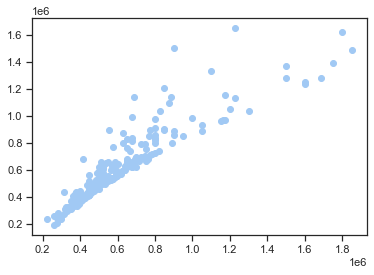

In [74]:
plt.scatter(y_test, predictions)

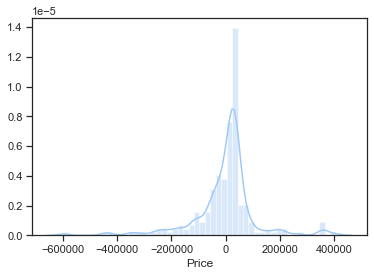

In [75]:
sns.distplot((y_test-predictions),bins = 50);

In [76]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 71598.26591223945
MSE: 13737121986.438951
RMSE: 117205.46909781537


In [77]:
## model is able to predict the value of every house in the test set within $117,205 of the Price

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test,y_test))

Random Forest R squared: 0.9724


In [80]:
y_pred = forest_reg.predict(X_test)
forest_mse = metrics.mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 47809.6910


In [81]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [82]:
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared: 0.9806


In [83]:
y_pred = model.predict(X_test)
model_mse = metrics.mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 40059.4093


### 3.3 Methods

I used the following libraries:

pandas,
haversine,
geopandas,
matplotlib,
folium,
sklearn,

I used haversine to determine the distance between 2 points and created a for loop to add a new column 'Distance'

I used folium to plot the housing location on a geographic map 

I used sklearn to create a linear regression model between price and sqft amongst other features

I also confirmed the high R squared scores with a Random Forest Regression and Gradient Boosting Regression.





[Back to top](#Table-of-contents)

### 3.4 Analysis 

When I first started to analyze the data you could see a poor correlation between Distance and Price from the scatter plots.  However, Sqft vs Price seems to have a strong positive correlation.  From the corr() function you were able to prove this to be correct.  As Sqft went up so did Beds, Bathrooms as well as the Price.  I divided the dataframe in 3 Neighborhood categories low price, high price low frequency, and high price high frequency.  I created a model that used Sqft, Beds, Baths, and Neighborhood to predict Price.

[Back to top](#Table-of-contents)

### 3.5 Results

The was a very poor correlation between Distance and Price. From the folium geographic plot you could see that there were more expensive houses in Downtown, West(close to the mountains), and South.  However, there was a strong correlation between Sqft and Price.  I had a linear regression R squared score of 83.  83% of the variability in Y can be explained from the features we used as our X.  This is a strong score.  Although this score is strong I decided to use the same features and target in a Random Forest Regression and Gradient Boosting Regression.  Both models had strong R squared scores of 97-98 and RMSE score around 40,000.  The model was able to predict the value of every house in the test set within 50,000 -  40,000 of the real price.

[Back to top](#Table-of-contents)

## Conclusion

There isn't a strong correlation between Distance and Price but there is a good relationship between Sqft and Price.  My original hypothesis was incorrect.  I had strong result from Sqft, Beds, Bathrooms, and Garage to predict Price.  I would like to continue my program and dive deeper into location.  It seems that you can identify the pricier neighborhoods and see if that correlates with low crime rate and better rated schools.  I will continue to develop this program for future use.  I think it would be helpful on deciding where to live if you are moving to a new city.

[Back to top](#Table-of-contents)

## References

- Zillow.com, Search criteria: Denver

- Li , Susan. 2017. Linear Regression in Python; Predict The Bay Area’s Home Prices. https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

[Back to top](#Table-of-contents)